An Ecommerce company based in New York City sells clothing online, but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. This project uses fake customer data.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#saving data from csv file into dataframe
customers = pd.read_csv('../input/Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


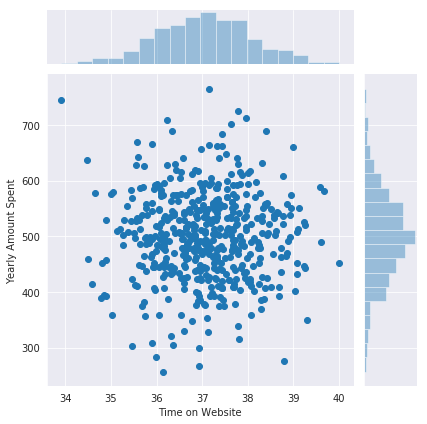

In [6]:
#Performing exploratory analysis
#analyzing yearly amount spent vs time on website
sns.set_style('darkgrid')
sns.jointplot(x=customers['Time on Website'], y=customers['Yearly Amount Spent'], data=customers)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


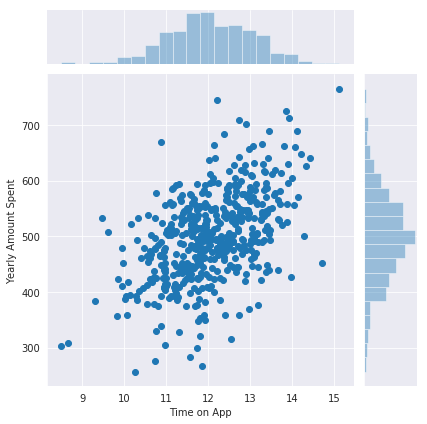

In [7]:
#analyzing yearly amount spent vs time on app
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


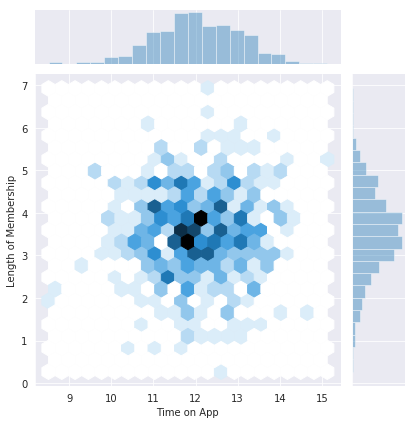

In [8]:
#analyzing yearly amount spent vs the length of membership
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

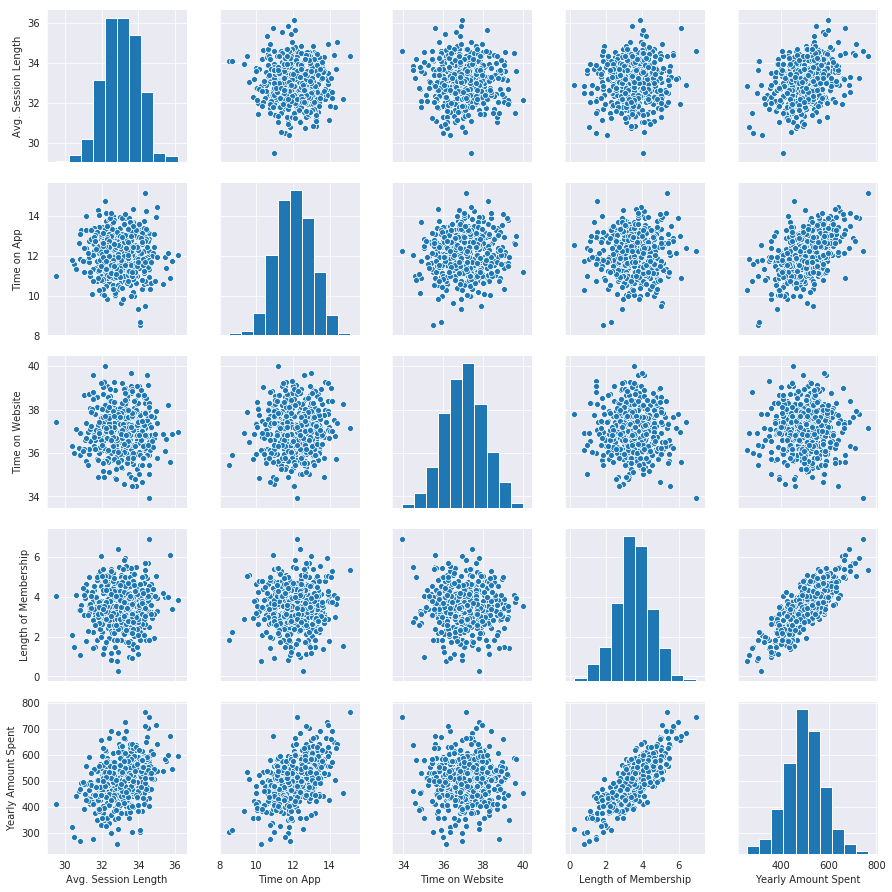

In [9]:
#analyzing these types of relationships all across the data set
sns.pairplot(customers)

Based on this, the Length of Membership appears to be most corelated with the Yearly Amount Spent.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


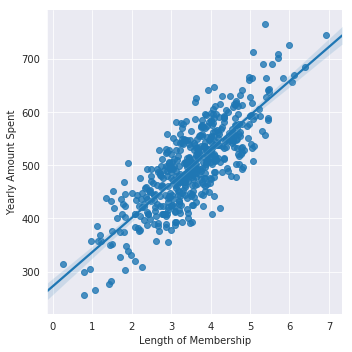

In [10]:
#Creating a linear model using seaborn to plot the relationship between Yearly Amount Spent vs Length of Membership
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

In [11]:
#Training and testing data
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [12]:
#Training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#printing coefficients
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

Text(0.5,0,'y test')

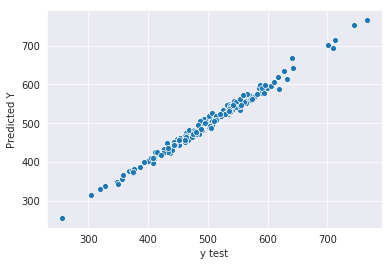

In [14]:
predictions = lm.predict(X_test)
sns.scatterplot(y = predictions, x = y_test)
plt.ylabel('Predicted Y')
plt.xlabel('y test')

In [15]:
#Evaluating the performance of the model by calculating the residual sum of squares and the variance score R^2
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predictions), ', Mean Squared Error: ',
      metrics.mean_squared_error(y_test, predictions) , ', Root Mean Squared Error: ', 
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error:  7.228148653430855 , Mean Squared Error:  79.81305165097481 , Root Mean Squared Error:  8.933815066978655


In [16]:
print('R^2: Variance Score is ', metrics.explained_variance_score(y_test, predictions))
#This means the model explains nearly 99% of the variance.

R^2: Variance Score is  0.9890771231889607


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


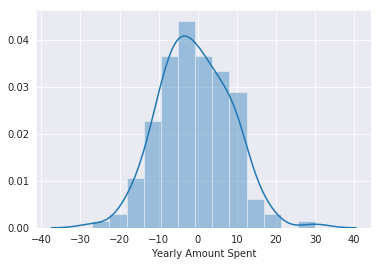

In [17]:
#Plotting a histogram of residuals
sns.distplot(y_test-predictions)

In [18]:
#Analyzing coefficients
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**Conclusion: **

Length of Membership appears to be most critical to the Yearly Amount Spent.
The app helps make 38.59 dollars and the website only 19 cents per unit time spent on it.
Depending on the cost associated with improving either, a decision may be made on where it is best to focus in order to improve Yearly Amount Spent of consumers.